In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

In [2]:
datum = '?????'
ext = '.neu'
dir_in = 'data/GPS'

In [3]:
pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS\d*?????.neu


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\dAB44_99999X006_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2005-08-15  -13.4 -11.4      16.3       4.3      3.7         10.3
2005-08-16  -12.0 -12.5      13.7       3.9      3.5          9.5
2005-08-17  -14.2 -13.7      18.5       3.8      3.3         10.0
2005-08-18  -12.4 -13.2      19.6       3.7      3.3          9.5
2005-08-19  -13.2 -11.6      22.9       4.8      4.0         10.6


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                              
2005-10-06  314.5  262.3     -67.3       1.2      0.7          3.7
2005-10-07  313.4  266.7     -65.5       1.1      0.7          3.3
2005-10-08  313.9  262.7     -63.4       1.0      0.6          3.2
2005-10-09  315.5  265.1     -64.0       1.0      0.6          3.2
2005-10-10  316.3  265.4     -64.7       1.1      0.7         

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, period):  
    
    decomposition = seasonal_decompose(df[var], freq = period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    print(f'\n\n{filepath}')
    print(df.head())
    print(f'{site} Seasonal Amplitude =', Amplitude)
    #seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                            #colums = ['Site_Name', 'Seasonal_Amplitude'])
    #seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')



data/GPS\dAB44_99999X006_ULR6B.neu
f: 0


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dAB44_99999X006_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2005-08-15  -13.4 -11.4      16.3       4.3      3.7         10.3       NaN   
2005-08-16  -12.0 -12.5      13.7       3.9      3.5          9.5       NaN   
2005-08-17  -14.2 -13.7      18.5       3.8      3.3         10.0       NaN   
2005-08-18  -12.4 -13.2      19.6       3.7      3.3          9.5       NaN   
2005-08-19  -13.2 -11.6      22.9       4.8      4.0         10.6       NaN   

            trend  
Year               
2005-08-15    NaN  
2005-08-16    NaN  
2005-08-17    NaN  
2005-08-18    NaN  
2005-08-19    NaN  
AB44 Seasonal Amplitude = 27.4971819960861


data/GPS\dAB48_XXXXXXXXX_JPL14.neu
f: 1


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dAB48_XXXXXXXXX_JPL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
2005-10-06  314.5  262.3     -67.3       1.2      0.7          3.7       NaN   
2005-10-07  313.4  266.7     -65.5       1.1      0.7          3.3       NaN   
2005-10-08  313.9  262.7     -63.4       1.0      0.6          3.2       NaN   
2005-10-09  315.5  265.1     -64.0       1.0      0.6          3.2       NaN   
2005-10-10  316.3  265.4     -64.7       1.1      0.7          3.2       NaN   

            trend  
Year               
2005-10-06    NaN  
2005-10-07    NaN  
2005-10-08    NaN  
2005-10-09    NaN  
2005-10-10    NaN  
AB48 Seasonal Amplitude = 11.448408851422553


data/GPS\dAB50_99999X007_ULR6B.neu
f: 2


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dAB50_99999X007_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2005-08-18  -16.1 -17.9      31.7       3.6      3.4          9.4       NaN   
2005-08-19  -17.5 -16.6      34.8       3.6      3.1          9.7       NaN   
2005-08-20  -15.3 -15.4      21.6       3.1      2.9          7.8       NaN   
2005-08-21  -15.2 -12.3      22.7       3.1      2.8          7.6       NaN   
2005-08-22  -14.6 -17.2      21.4       3.2      2.9          7.8       NaN   

            trend  
Year               
2005-08-18    NaN  
2005-08-19    NaN  
2005-08-20    NaN  
2005-08-21    NaN  
2005-08-22    NaN  
AB50 Seasonal Amplitude = 20.443326810176124


data/GPS\dANC2_XXXXXXXXX_NGL14.neu
f: 3


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dANC2_XXXXXXXXX_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2009-12-10   85.6  71.0     -35.6       2.2      1.4          3.1       NaN   
2009-12-11   85.8  68.9     -35.4       2.2      1.4          3.2       NaN   
2009-12-12   88.6  71.4     -35.9       2.2      1.4          3.2       NaN   
2009-12-13   87.0  71.0     -33.2       2.2      1.4          3.1       NaN   
2009-12-14   86.5  70.9     -30.4       2.2      1.4          3.1       NaN   

            trend  
Year               
2009-12-10    NaN  
2009-12-11    NaN  
2009-12-12    NaN  
2009-12-13    NaN  
2009-12-14    NaN  
ANC2 Seasonal Amplitude = 20.743257229832572


data/GPS\dCHUR_40128M002_ULR6B.neu
f: 4


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dCHUR_40128M002_ULR6B.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
1995-02-19   34.2  165.6    -100.1       2.5      3.1          8.4       NaN   
1995-02-20   35.4  166.3    -103.7       2.7      3.8          8.9       NaN   
1995-02-21   37.6  170.4     -94.9       2.8      3.8          8.1       NaN   
1995-02-22   37.3  166.6     -95.0       3.4      4.6          9.2       NaN   
1995-02-23   35.8  164.7    -100.1       3.1      4.0          8.1       NaN   

            trend  
Year               
1995-02-19    NaN  
1995-02-20    NaN  
1995-02-21    NaN  
1995-02-22    NaN  
1995-02-23    NaN  
CHUR Seasonal Amplitude = 7.632425463336022


data/GPS\dEYAC_99999X043_ULR6B.neu
f: 5


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dEYAC_99999X043_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2005-07-10   11.6 -23.2       6.3       3.3      3.1          8.0       NaN   
2005-07-11   13.7 -20.6       5.8       3.0      2.9          6.8       NaN   
2005-07-12   10.6 -24.9       1.0       3.1      3.0          7.6       NaN   
2005-07-13   -2.1 -21.7      -9.2       3.2      3.0          7.8       NaN   
2005-07-14    7.2 -21.9       1.2       2.8      2.7          6.3       NaN   

            trend  
Year               
2005-07-10    NaN  
2005-07-11    NaN  
2005-07-12    NaN  
2005-07-13    NaN  
2005-07-14    NaN  
EYAC Seasonal Amplitude = 20.7426614481409


data/GPS\dJNU1_49519S001_NGL14.neu
f: 6


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dJNU1_49519S001_NGL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
2003-01-27  124.8  112.0    -168.5       3.4      2.5          4.6       NaN   
2003-01-28  127.2  112.2    -164.3       2.7      2.0          3.6       NaN   
2003-01-29  127.0  105.3    -162.1       2.8      2.1          3.6       NaN   
2003-01-30  125.8  109.2    -164.5       3.3      2.5          4.3       NaN   
2003-02-01  127.7  110.0    -162.6       2.7      2.0          3.6       NaN   

            trend  
Year               
2003-01-27    NaN  
2003-01-28    NaN  
2003-01-29    NaN  
2003-01-30    NaN  
2003-02-01    NaN  
JNU1 Seasonal Amplitude = 21.037278538812785


data/GPS\dKEN5_XXXXXXXXX_NGL14.neu
f: 7


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dKEN5_XXXXXXXXX_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
1996-01-31  355.9  52.9    -334.1       2.9      1.8          3.9       NaN   
1996-02-01  354.0  54.0    -331.9       3.0      1.9          4.2       NaN   
1996-02-03  351.9  52.8    -321.6       2.9      1.8          4.0       NaN   
1996-02-04  350.6  51.8    -313.5       3.0      1.9          4.1       NaN   
1996-02-05  353.9  52.4    -306.7       3.0      1.9          4.1       NaN   

            trend  
Year               
1996-01-31    NaN  
1996-02-01    NaN  
1996-02-03    NaN  
1996-02-04    NaN  
1996-02-05    NaN  
KEN5 Seasonal Amplitude = 23.002264721579795


data/GPS\dNUUK_43013M001_NGL14.neu
f: 8


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dNUUK_43013M001_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2008-09-30  -47.0  75.8     -31.1       3.3      2.3          5.4       NaN   
2008-10-02  -47.3  76.9     -28.8       2.1      1.4          3.5       NaN   
2008-10-03  -46.3  76.4     -27.5       2.1      1.4          3.5       NaN   
2009-01-01  -43.1  74.3     -35.0       2.1      1.4          3.4       NaN   
2009-01-02  -42.6  74.4     -36.5       2.1      1.4          3.5       NaN   

            trend  
Year               
2008-09-30    NaN  
2008-10-02    NaN  
2008-10-03    NaN  
2009-01-01    NaN  
2009-01-02    NaN  
NUUK Seasonal Amplitude = 46.680508806262225


data/GPS\dQAQ1_43007M001_ULR6B.neu
f: 9


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dQAQ1_43007M001_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2002-05-23  -27.7  33.9      -9.0       2.4      2.4          5.7       NaN   
2002-05-24  -32.4  31.7      -6.9       3.6      3.9          6.5       NaN   
2002-05-25  -29.1  32.6     -16.1       2.6      2.6          5.8       NaN   
2002-05-26  -32.2  33.7      -9.2       3.4      3.1          7.0       NaN   
2002-05-27  -29.2  31.0     -16.5       2.6      2.9          6.5       NaN   

            trend  
Year               
2002-05-23    NaN  
2002-05-24    NaN  
2002-05-25    NaN  
2002-05-26    NaN  
2002-05-27    NaN  
QAQ1 Seasonal Amplitude = 14.917257783312579


data/GPS\dSCOR_43006M002_ULR6B.neu
f: 10


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dSCOR_43006M002_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2005-02-02   12.2  -5.3       8.1       8.8      7.6         27.9       NaN   
2005-02-03   17.4 -10.8       7.6       3.2      2.9          6.8       NaN   
2005-02-04   10.2  -4.6       2.9       2.8      2.9          6.8       NaN   
2005-02-05   11.8  -6.2       8.2       2.6      2.2          6.4       NaN   
2005-02-06   12.0  -3.4       8.5       2.9      2.9          8.3       NaN   

            trend  
Year               
2005-02-02    NaN  
2005-02-03    NaN  
2005-02-04    NaN  
2005-02-05    NaN  
2005-02-06    NaN  
SCOR Seasonal Amplitude = 14.18291095890411


data/GPS\dTBON_XXXXXXXXX_NGL14.neu
f: 11


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dTBON_XXXXXXXXX_NGL14.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
2008-04-26   81.7  121.5     -20.8       2.4      1.5          3.4       NaN   
2008-04-27   84.8  120.9     -27.0       2.4      1.5          3.4       NaN   
2008-04-28   84.0  121.1     -28.1       2.4      1.5          3.4       NaN   
2008-04-29   82.5  121.1     -27.0       2.3      1.4          3.4       NaN   
2008-04-30   82.7  121.5     -25.5       2.3      1.4          3.4       NaN   

            trend  
Year               
2008-04-26    NaN  
2008-04-27    NaN  
2008-04-28    NaN  
2008-04-29    NaN  
2008-04-30    NaN  
TBON Seasonal Amplitude = 21.42807721046077


data/GPS\dTHU1_43001M001_ULR6B.neu
f: 12


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dTHU1_43001M001_ULR6B.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
1995-05-03  -43.5  203.8     -16.3       2.5      2.1          9.1       NaN   
1995-05-04  -43.0  202.8     -11.5       1.9      1.7          9.0       NaN   
1995-05-05  -39.4  203.3     -10.8       2.5      2.9         12.6       NaN   
1995-05-06  -41.2  203.1     -24.2       2.1      1.6          8.5       NaN   
1995-05-07  -44.3  203.6     -18.1       2.6      2.0         10.0       NaN   

            trend  
Year               
1995-05-03    NaN  
1995-05-04    NaN  
1995-05-05    NaN  
1995-05-06    NaN  
1995-05-07    NaN  
THU1 Seasonal Amplitude = 30.360547945205482


data/GPS\dTHU2_43001M002_ULR6B.neu
f: 13


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dTHU2_43001M002_ULR6B.neu
            North   East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                           
1998-11-15  -27.6  128.2     -45.7       2.7      2.5          8.0       NaN   
1998-11-16  -25.1  123.1     -43.8       3.1      3.3          8.5       NaN   
1998-11-17  -26.5  125.1     -40.7       2.6      2.5          8.8       NaN   
1998-11-19  -26.6  127.3     -41.9       2.7      2.7          8.3       NaN   
1998-11-20  -25.3  126.3     -34.8       2.8      2.7          8.4       NaN   

            trend  
Year               
1998-11-15    NaN  
1998-11-16    NaN  
1998-11-17    NaN  
1998-11-19    NaN  
1998-11-20    NaN  
THU2 Seasonal Amplitude = 12.92004214963119


data/GPS\dTHU3_43001M002_ULR6B.neu
f: 14


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\dTHU3_43001M002_ULR6B.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD  denoised  \
Year                                                                          
2002-05-25  -11.9  47.2     -12.3       3.0      2.8          7.6       NaN   
2002-05-26  -11.4  48.4     -11.5       3.4      3.1          7.8       NaN   
2002-05-27  -11.0  48.0     -11.5       2.8      3.0          8.0       NaN   
2002-05-28   -9.5  45.5      -7.9       3.6      3.6          9.5       NaN   
2002-05-29   -9.6  51.3     -11.9       2.8      2.8          7.4       NaN   

            trend  
Year               
2002-05-25    NaN  
2002-05-26    NaN  
2002-05-27    NaN  
2002-05-28    NaN  
2002-05-29    NaN  
THU3 Seasonal Amplitude = 14.653703611457033


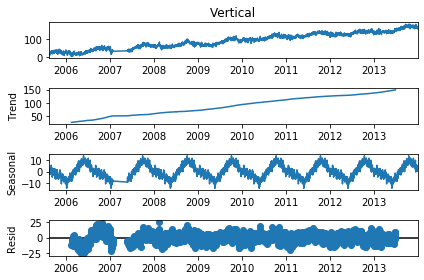

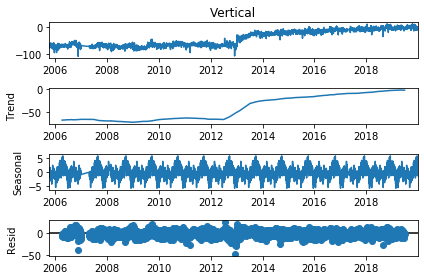

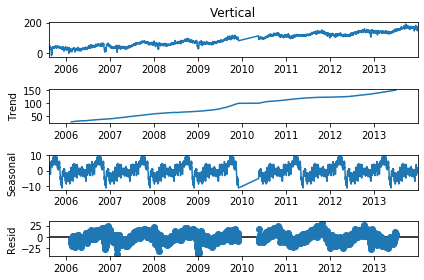

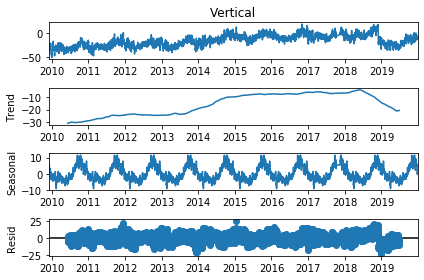

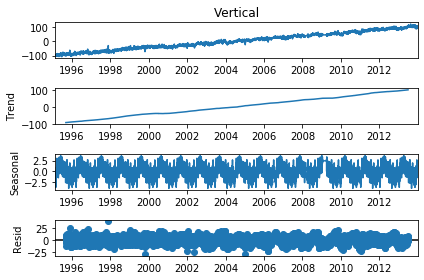

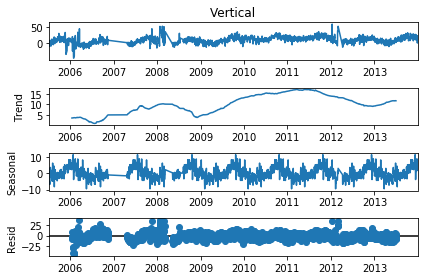

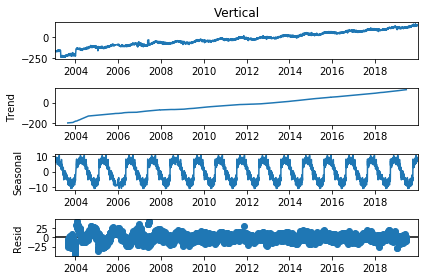

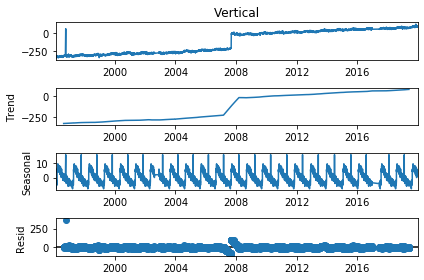

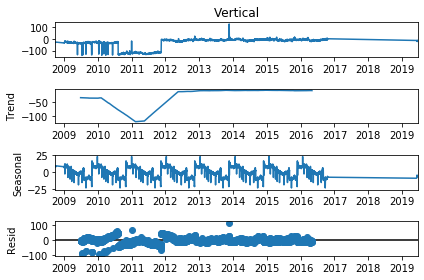

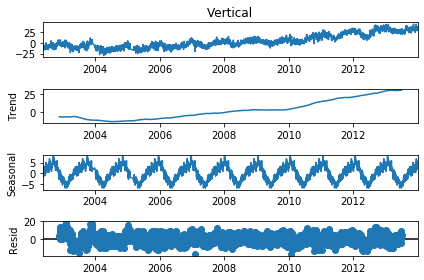

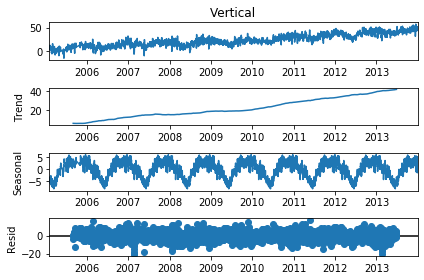

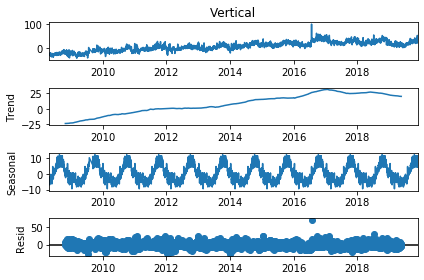

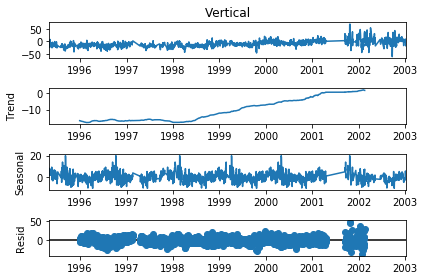

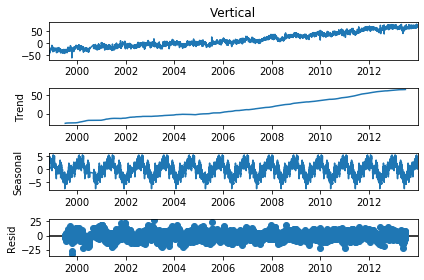

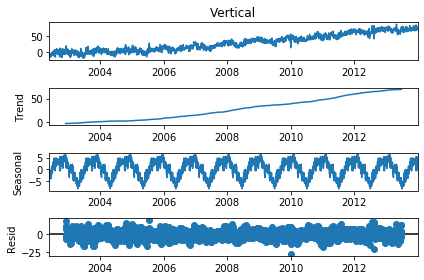

In [29]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_SONEL(filepath)
    df = decompose(df, 'Vertical', filepath[-24:-20], 365)

# Change Point Detection
def change_pt_detection(df, var, points):
    model = "l1"  
    algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
    my_bkps = algo.predict(n_bkps=10)

    
def change_pt_plot()
    rpt.show.display(points, my_bkps, figsize=(10, 6))
    plt.suptitle(f"{site}Change Point Detection")
    plt.show()

In [8]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, site, var, trend_array):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {trend_array * 1:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    

In [9]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend



data/GPS\dAB44_99999X006_ULR6B.neu
f: 0
Trend = 17.25 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 5.053e+04
Date:                Wed, 05 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:43:39   Log-Likelihood:                -10683.
No. Observations:                2909   AIC:                         2.137e+04
Df Residuals:                    2907   BIC:                         2.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------



data/GPS\dEYAC_99999X043_ULR6B.neu
f: 5
Trend = 1.47 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     352.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):           3.54e-74
Time:                        21:44:14   Log-Likelihood:                -10012.
No. Observations:                2769   AIC:                         2.003e+04
Df Residuals:                    2767   BIC:                         2.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------



data/GPS\dSCOR_43006M002_ULR6B.neu
f: 10
Trend = 4.53 mm/yr
                            OLS Regression Results                            
Dep. Variable:               Vertical   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Wed, 05 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:44:54   Log-Likelihood:                -10022.
No. Observations:                3153   AIC:                         2.005e+04
Df Residuals:                    3151   BIC:                         2.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

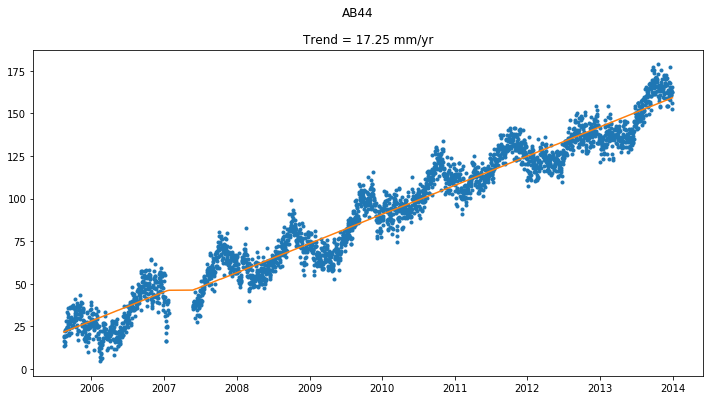

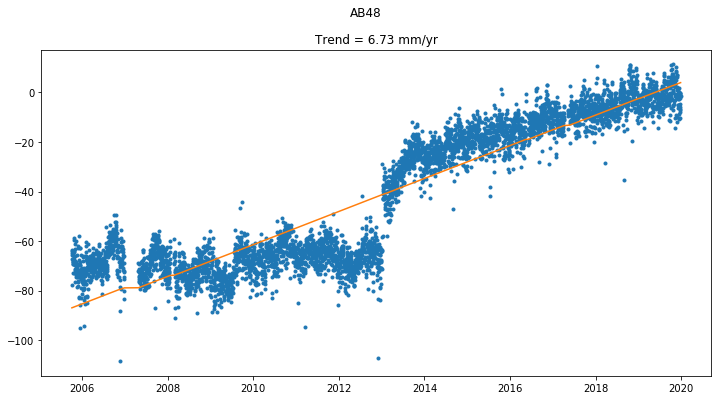

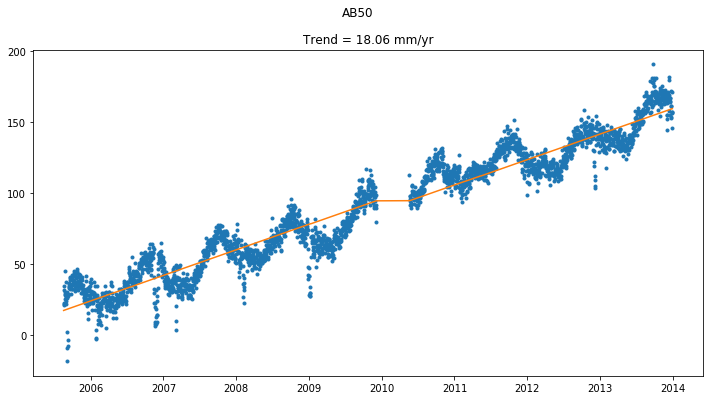

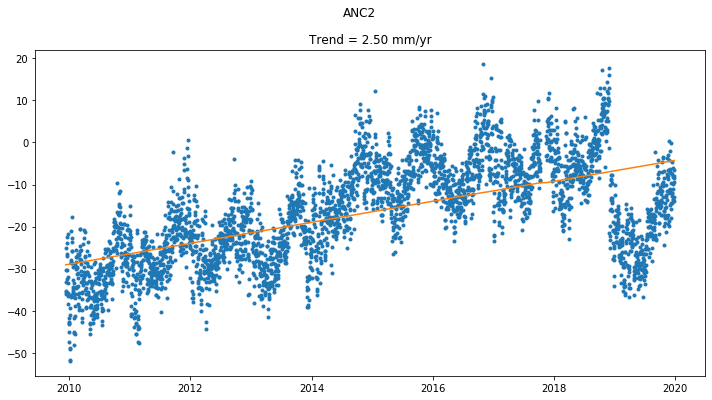

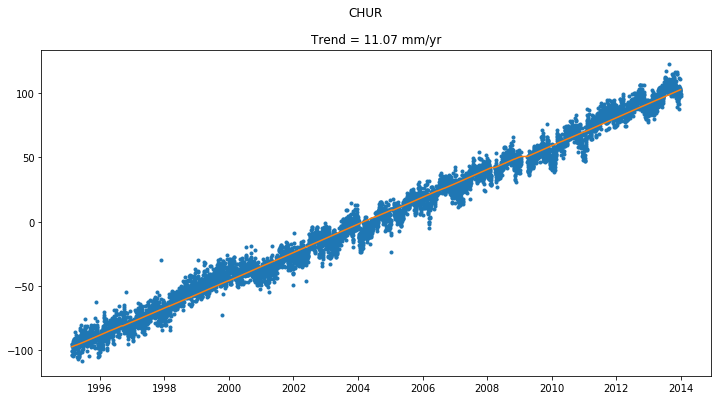

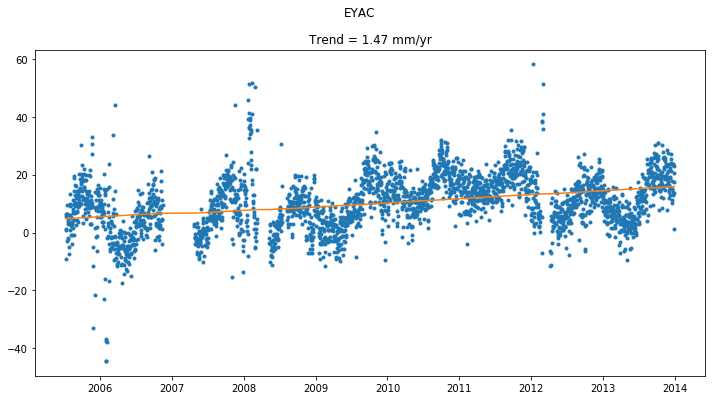

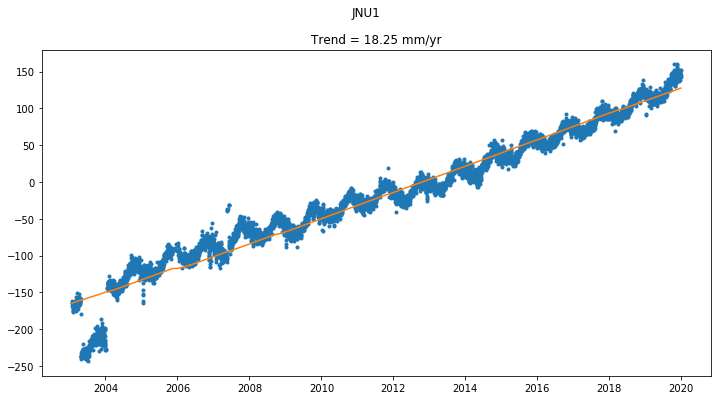

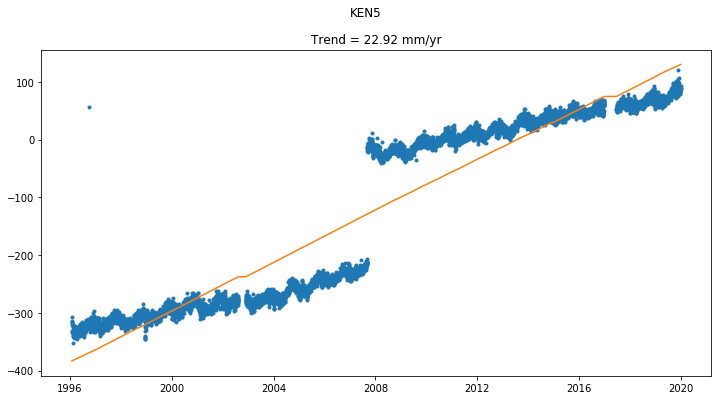

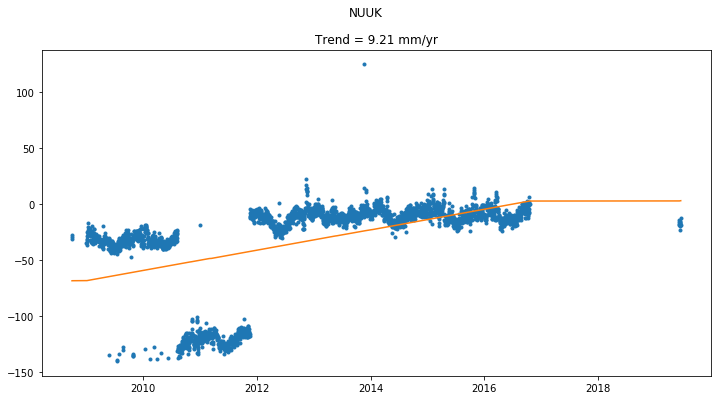

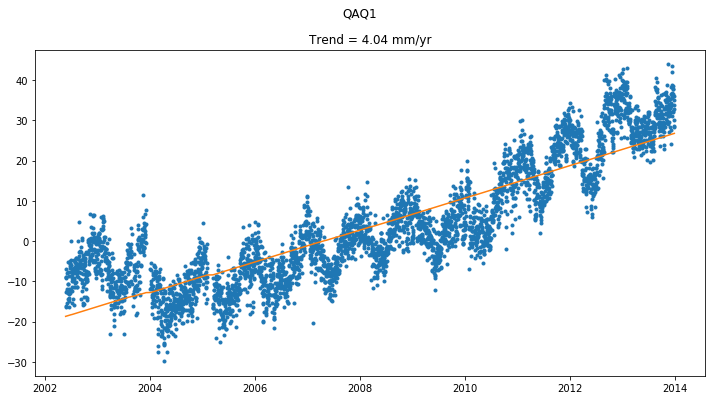

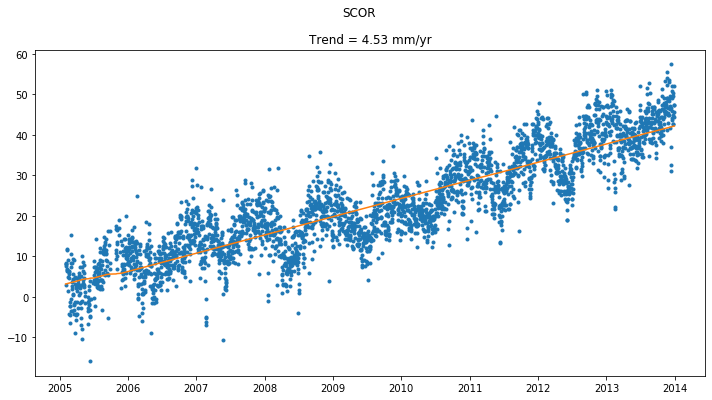

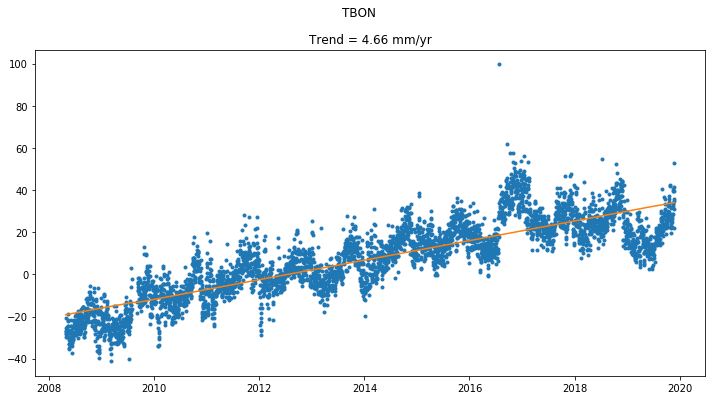

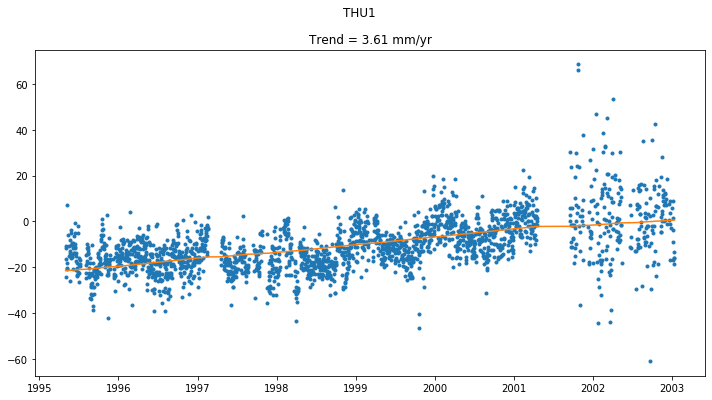

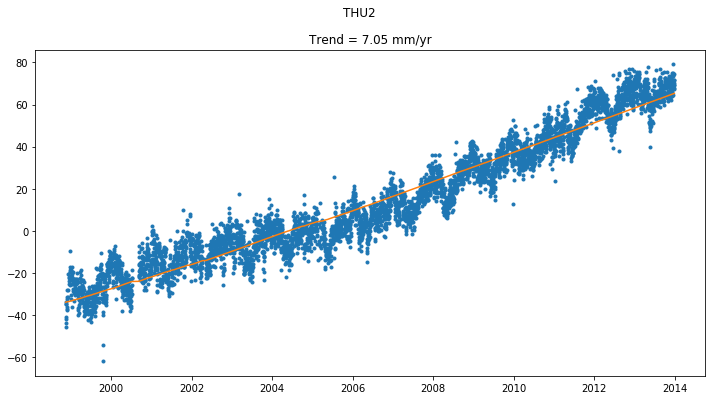

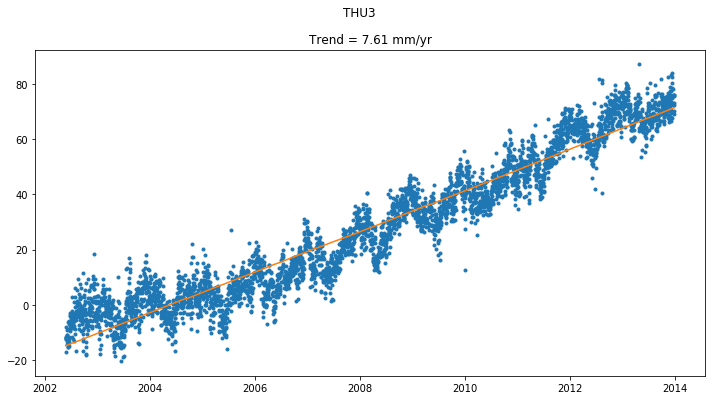

In [10]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)
    
    
    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = convert_trend_toyearly(df, res)
    
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1:.2f} mm/yr")
    
    print(res.summary())
   # np.savetxt('GPS_trend.csv', {sonel_trend_array[f] * 365:.2f}, delimiter=',')
    # Make Plot
    test_plot_OLS(df, res, filepath[-24:-20], 'Vertical', sonel_trend_array[f])
    
    

In [11]:
from tidegauge_functions import get_SONEL_headerinfo

sonel_SiteID_array = []
sonel_Lat_array = np.full(np.shape(filenames)[0], np.nan)
sonel_Lon_array = np.full(np.shape(filenames)[0], np.nan)
sonel_Height_array = np.full(np.shape(filenames)[0], np.nan)


for f, filepath in enumerate(filenames):
    a,b,c,d = get_SONEL_headerinfo(filenames[f])
    print('\n',a,b,c,d)
    temp_name, sonel_Lat_array[f], sonel_Lon_array[f], sonel_Height_array[f] = \
        get_SONEL_headerinfo(filenames[f])
    #temp_name, temp_lat, temp_lon, temp_height = get_SONEL_headerinfo(filenames[f])
    sonel_SiteID_array.append(temp_name)
#     sonel_Lat_array.append(temp_lat)


# Site ID: AB44


 AB44 59.52803911 -135.22829744 304.0995
# Site ID: AB44

# Site ID: AB48


 AB48 56.24505997 -134.64700034 5.331
# Site ID: AB48

# Site ID: AB50


 AB50 58.41677591 -134.54530025 51.4695
# Site ID: AB50

# Site ID: ANC2


 ANC2 61.17522442 -149.98344307 57.883
# Site ID: ANC2

# Site ID: CHUR


 CHUR 58.75907776 -94.08872764 -19.3604
# Site ID: CHUR

# Site ID: EYAC


 EYAC 60.54870384 -145.74985747 146.0126
# Site ID: EYAC

# Site ID: JNU1


 JNU1 58.36257477 -134.58570662 15.646
# Site ID: JNU1

# Site ID: KEN5


 KEN5 60.67507812 -151.35018263 56.324
# Site ID: KEN5

# Site ID: NUUK


 NUUK 64.18355313 -51.73116095 109.368
# Site ID: NUUK

# Site ID: QAQ1


 QAQ1 60.71526339 -46.04776278 110.4150
# Site ID: QAQ1

# Site ID: SCOR


 SCOR 70.48533354 -21.95033614 128.4940
# Site ID: SCOR

# Site ID: TBON


 TBON 61.17971547 -149.78514271 93.169
# Site ID: TBON

# Site ID: THU1


 THU1 76.53733733 -68.78801297 55.0232
# Site ID: THU1

# Site ID: THU2


 THU2 76.5370

In [12]:
print(sonel_Lat_array)
print(sonel_Lon_array)

[59.52803911 56.24505997 58.41677591 61.17522442 58.75907776 60.54870384
 58.36257477 60.67507812 64.18355313 60.71526339 70.48533354 61.17971547
 76.53733733 76.53704754 76.53704754]
[-135.22829744 -134.64700034 -134.54530025 -149.98344307  -94.08872764
 -145.74985747 -134.58570662 -151.35018263  -51.73116095  -46.04776278
  -21.95033614 -149.78514271  -68.78801297  -68.82503642  -68.82503642]


In [13]:
#Write CSV trend array
columns = ['SITE', 'LAT', 'LON', 'Height', 'TREND_Vertical']
out_array = np.array([site_name_array, sonel_Lat_array, sonel_Lon_array,sonel_Height_array, sonel_trend_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_SONEL.csv')  # , na_rep=" ")

PermissionError: [Errno 13] Permission denied: 'data/trends_OLS_SONEL.csv'